In [1]:
import pandas as pd 
import sklearn  
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report
#---------------------------------------------------------------------------------
simplify = pd.read_csv('penguins_size.csv') #7 344
full = pd.read_csv('penguins_lter.csv') # 17 344 
#---------------------------------------------------------------------------------
#train:test = 2: 1---------------------------------------------------------------------------------
test_simplify = simplify.iloc[2::3].copy() # 2 5 8............
##print(test_simplify.index.tolist())
train_index = list(range(0,len(simplify),3)) + list(range(1,len(simplify),3))
train_index = sorted(train_index)
train_simplify = simplify.iloc[train_index].copy() # 0 1 3 4...............
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#-------------------------------------------------------------------------------------------------
# 建立  HistGradient 模型
para1 = [8,12,16]
para2 = [0.6,0.7,0.8,1] 
para3 = [2,3,4] 
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1):
    j = 0
    while j < len(para2): 
        k = 0
        while k < len(para3):
            classifier = HistGradientBoostingClassifier(max_iter=para1[i],learning_rate = para2[j], max_depth = para3[k],random_state=100)
            model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y) 
            # 預測
            test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
            predict = test_simplify_y_predicted.tolist()
            ##print(predict)
            # -------------------------------------------------------
            test_simplify['predict'] = predict
            answer = {"species": test_simplify[factor[0]], "predict": predict}
            answer_df = pd.DataFrame(answer)
            #print(answer_df) 
            print('i:',i,'j:',j,'k:',k)
            #Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
            #for l in range(47):
            #    if predict[l]=='Adelie':
            #       Ade[0]+=1
            #    if predict[l]=='Chinstrap':
            #        Chi[0]+=1
            #    if predict[l]=='Gentoo':
            #        Gen[0]+=1
            #for l in range(23):
            #    if predict[47+l]=='Adelie':
            #        Ade[1]+=1
            #    if predict[47+l]=='Chinstrap':
            #        Chi[1]+=1
            #    if predict[47+l]=='Gentoo':
            #        Gen[1]+=1   
            #for l in range(41):
            #    if predict[70+l]=='Adelie':
            #        Ade[2]+=1
            #    if predict[70+l]=='Chinstrap':
            #        Chi[2]+=1
            #    if predict[70+l]=='Gentoo':
            #        Gen[2]+=1  
            #fig, ax = plt.subplots(figsize=(4,4))  
            #X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
            #X1.index = ["Adelie","Chinstrap","Gentoo"] 
            #sns.heatmap(X1 , cmap="coolwarm",annot=True ,ax=ax,linecolor="purple")  
            #plt.xlabel("Predicted label")
            #plt.ylabel("True label")  
            #plt.show()  
            print(classification_report(test_simplify[factor[0]],predict)) 
            #count = count + 1
            k = k + 1
        j = j + 1
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

<ipython-input-1-3afe3e95d81f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-1-3afe3e95d81f>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

i: 0 j: 0 k: 0
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        47
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

i: 0 j: 0 k: 1
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        47
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.98      0.99        41

    accuracy                           0.98       111
   macro avg       0.99      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111

i: 0 j: 0 k: 2
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        47
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0

              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96        47
   Chinstrap       0.88      0.91      0.89        23
      Gentoo       1.00      0.98      0.99        41

    accuracy                           0.95       111
   macro avg       0.94      0.95      0.95       111
weighted avg       0.96      0.95      0.96       111

i: 2 j: 0 k: 0
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        47
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

i: 2 j: 0 k: 1
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        47
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.98      0.99  

In [2]:
#train:test = 3: 1---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
test_simplify = simplify.iloc[3::4].copy() # 3 7 11............
#print(test_simplify.index.tolist())
train_index = list(range(0,len(simplify),4)) + list(range(1,len(simplify),4)) + list(range(2,len(simplify),4))
train_index = sorted(train_index)
train_simplify = simplify.iloc[train_index].copy() # 0 1 2 4 5 6 8 9 10...............
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist()
print(dummy)
#-------------------------------------------------------------------------------------------------
# 建立 HistGradient 模型
para1 = [8,12,16]
para2 = [0.5,0.6,0.7,0.8] 
para3 = [2,3,4] 
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1):
    j = 0
    while j < len(para2):
        k = 0
        while k < len(para3):
            classifier = HistGradientBoostingClassifier(max_iter=para1[i],learning_rate = para2[j], max_depth = para3[k],random_state=100)
            model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
            # 預測
            test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
            predict = test_simplify_y_predicted.tolist()
            # -------------------------------------------------------
            test_simplify['predict'] = predict
            answer = {"species": test_simplify[factor[0]], "predict": predict}
            answer_df = pd.DataFrame(answer)
            ##print(answer_df) 
            print('i:',i,'j:',j,'k:',k)
            #Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
            #for l in range(35):
            #    if predict[l]=='Adelie':
            #        Ade[0]+=1
            #    if predict[l]=='Chinstrap':
            #        Chi[0]+=1
            #    if predict[l]=='Gentoo':
            #        Gen[0]+=1
            #for l in range(17):
            #    if predict[35+l]=='Adelie':
            #        Ade[1]+=1
            #    if predict[35+l]=='Chinstrap':
            #        Chi[1]+=1
            #    if predict[35+l]=='Gentoo':
            #        Gen[1]+=1   
            #for l in range(30):
            #    if predict[52+l]=='Adelie':
            #        Ade[2]+=1
            #    if predict[52+l]=='Chinstrap':
            #        Chi[2]+=1
            #    if predict[52+l]=='Gentoo':
            #        Gen[2]+=1  
            #fig, ax = plt.subplots(figsize=(6,3))  
            #X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
            #X1.index = ["Adelie","Chinstrap","Gentoo"] 
            #sns.heatmap(X1 , cmap="coolwarm",annot=True ,ax=ax,linecolor="purple")  
            #plt.xlabel("Predicted label")
            #plt.ylabel("True label")  
            #plt.show() 
            print(classification_report(test_simplify[factor[0]],predict)) 
            count = count + 1
            k = k + 1
        j = j + 1
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_FEMALE', 'sex_MALE']
i: 0 j: 0 k: 0
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        35
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      0.97      0.98        30

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82

i: 0 j: 0 k: 1


<ipython-input-2-5a17d8200500>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-2-5a17d8200500>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        35
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

i: 0 j: 0 k: 2
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        35
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      0.97      0.98        30

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82

i: 0 j: 1 k: 0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        35
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00  

i: 1 j: 3 k: 1
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        35
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

i: 1 j: 3 k: 2
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        35
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      0.97      0.98        30

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82

i: 2 j: 0 k: 0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        35
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1

<ipython-input-3-fdc825370f6c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-3-fdc825370f6c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_FEMALE', 'sex_MALE']
i: 0 j: 0 k: 0


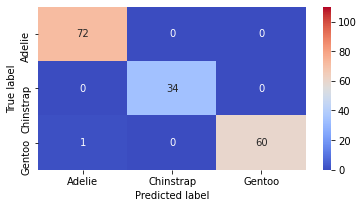

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 0 k: 1


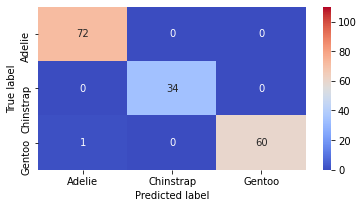

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 0 k: 2


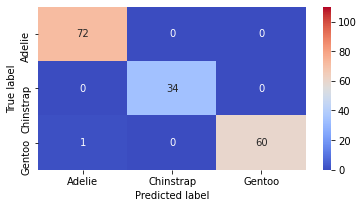

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 1 k: 0


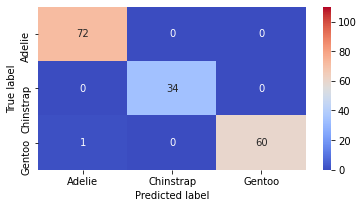

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 1 k: 1


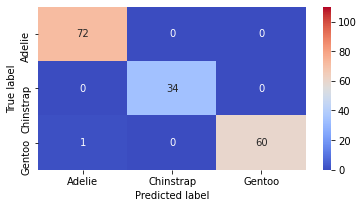

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 1 k: 2


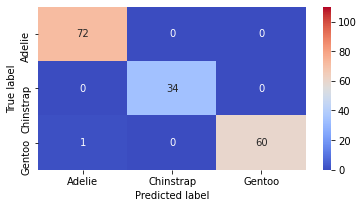

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 2 k: 0


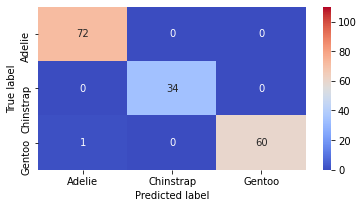

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 2 k: 1


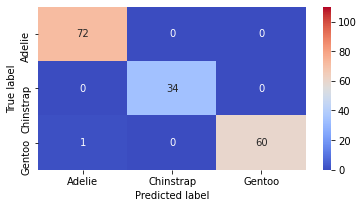

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 2 k: 2


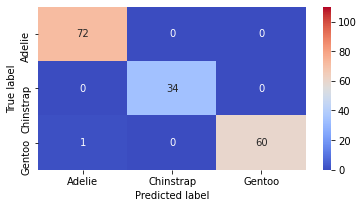

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 3 k: 0


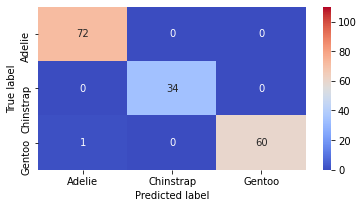

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 3 k: 1


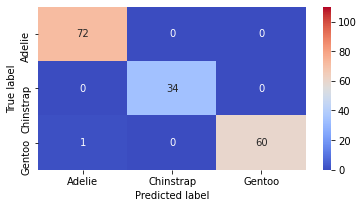

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 0 j: 3 k: 2


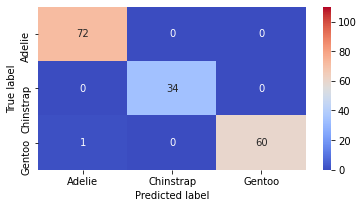

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 0 k: 0


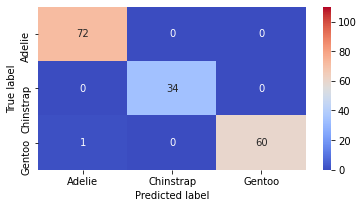

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 0 k: 1


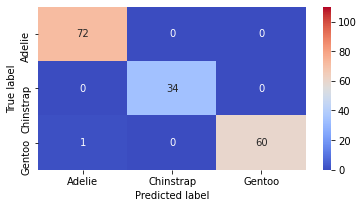

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 0 k: 2


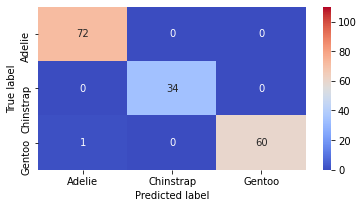

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 1 k: 0


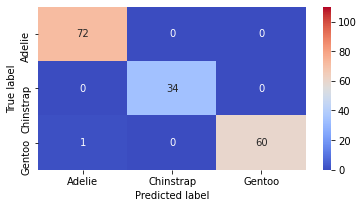

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 1 k: 1


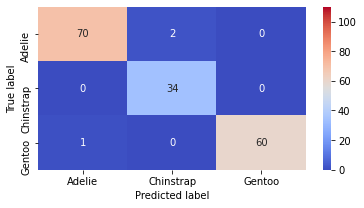

              precision    recall  f1-score   support

      Adelie       0.99      0.97      0.98        72
   Chinstrap       0.94      1.00      0.97        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.98       167
   macro avg       0.98      0.99      0.98       167
weighted avg       0.98      0.98      0.98       167

i: 1 j: 1 k: 2


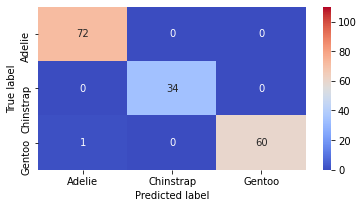

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 2 k: 0


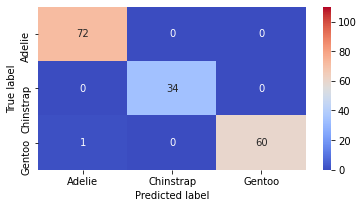

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 2 k: 1


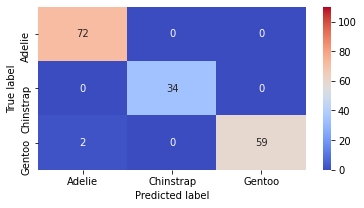

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.97      0.98        61

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 2 k: 2


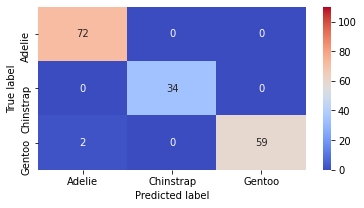

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.97      0.98        61

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 3 k: 0


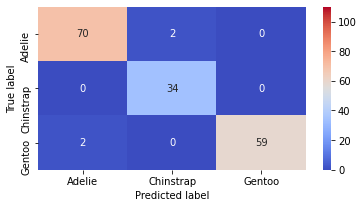

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        72
   Chinstrap       0.94      1.00      0.97        34
      Gentoo       1.00      0.97      0.98        61

    accuracy                           0.98       167
   macro avg       0.97      0.98      0.98       167
weighted avg       0.98      0.98      0.98       167

i: 1 j: 3 k: 1


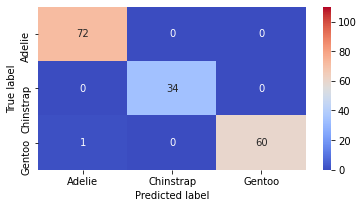

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 1 j: 3 k: 2


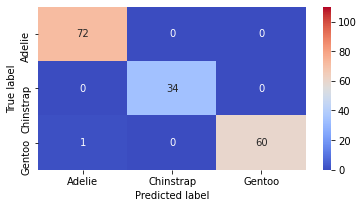

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 0 k: 0


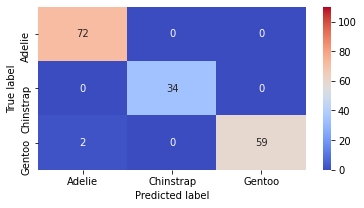

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.97      0.98        61

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 0 k: 1


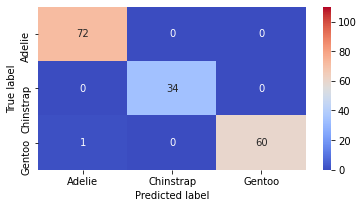

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 0 k: 2


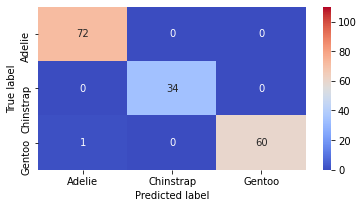

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 1 k: 0


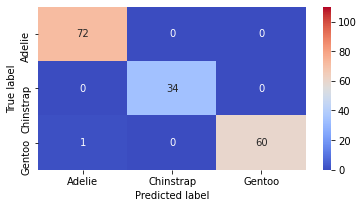

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 1 k: 1


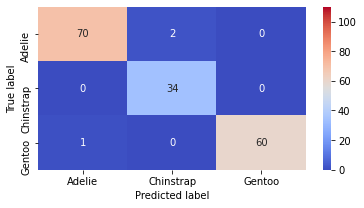

              precision    recall  f1-score   support

      Adelie       0.99      0.97      0.98        72
   Chinstrap       0.94      1.00      0.97        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.98       167
   macro avg       0.98      0.99      0.98       167
weighted avg       0.98      0.98      0.98       167

i: 2 j: 1 k: 2


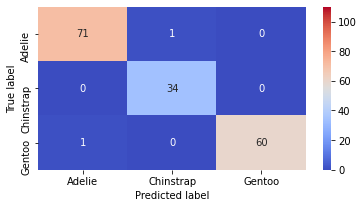

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99        72
   Chinstrap       0.97      1.00      0.99        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 2 k: 0


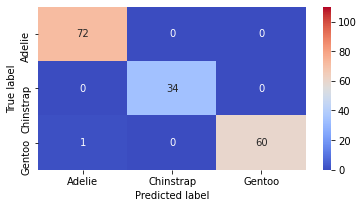

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 2 k: 1


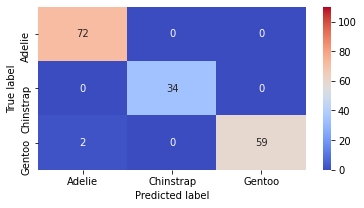

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.97      0.98        61

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 2 k: 2


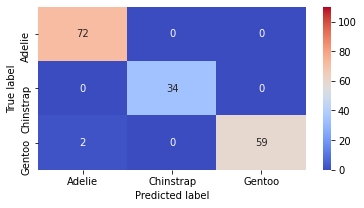

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.97      0.98        61

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 3 k: 0


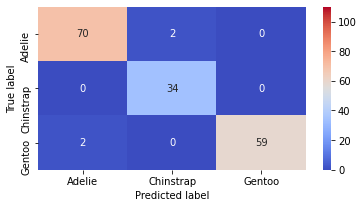

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        72
   Chinstrap       0.94      1.00      0.97        34
      Gentoo       1.00      0.97      0.98        61

    accuracy                           0.98       167
   macro avg       0.97      0.98      0.98       167
weighted avg       0.98      0.98      0.98       167

i: 2 j: 3 k: 1


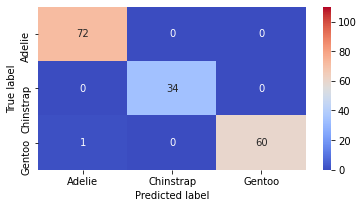

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167

i: 2 j: 3 k: 2


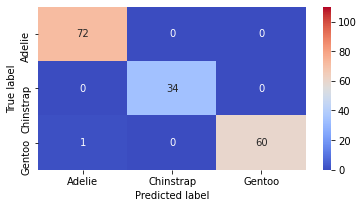

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        72
   Chinstrap       1.00      1.00      1.00        34
      Gentoo       1.00      0.98      0.99        61

    accuracy                           0.99       167
   macro avg       1.00      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167



In [3]:
#train:test = 1: 1---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
test_simplify = simplify.iloc[1::2].copy() # 1 3 5 7 ............
#print(test_simplify.index.tolist())
train_index = list(range(0,len(simplify),2)) 
train_index = sorted(train_index)
train_simplify = simplify.iloc[train_index].copy() # 0 2 4 6 8...............
#print(train_simplify.index.tolist())
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist()
print(dummy)
#-------------------------------------------------------------------------------------------------
# 建立 HistGradient 模型
para1 = [8,12,16]
para2 = [0.5,0.6,0.7,0.8] 
para3 = [2,3,4] 
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1):
    j = 0
    while j < len(para2):
        k = 0
        while k < len(para3):
            classifier = HistGradientBoostingClassifier(max_iter=para1[i],learning_rate = para2[j], max_depth = para3[k],random_state=100)
            model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
            # 預測
            test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
            predict = test_simplify_y_predicted.tolist()
            # -------------------------------------------------------
            test_simplify['predict'] = predict
            answer = {"species": test_simplify[factor[0]], "predict": predict}
            answer_df = pd.DataFrame(answer)
            ##print(answer_df) 
            print('i:',i,'j:',j,'k:',k)
            Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
            for l in range(72):
                if predict[l]=='Adelie':
                    Ade[0]+=1
                if predict[l]=='Chinstrap':
                    Chi[0]+=1
                if predict[l]=='Gentoo':
                    Gen[0]+=1
            for l in range(34):
                if predict[72+l]=='Adelie':
                    Ade[1]+=1
                if predict[72+l]=='Chinstrap':
                    Chi[1]+=1
                if predict[72+l]=='Gentoo':
                    Gen[1]+=1   
            for l in range(61):
                if predict[106+l]=='Adelie':
                    Ade[2]+=1
                if predict[106+l]=='Chinstrap':
                    Chi[2]+=1
                if predict[106+l]=='Gentoo':
                    Gen[2]+=1  
            fig, ax = plt.subplots(figsize=(6,3))  
            X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
            X1.index = ["Adelie","Chinstrap","Gentoo"] 
            sns.heatmap(X1 , cmap="coolwarm" , fmt = 'd',annot=True ,ax=ax,linecolor="purple",vmax = 110)  
            plt.xlabel("Predicted label")
            plt.ylabel("True label")  
            plt.show() 
            print(classification_report(test_simplify[factor[0]],predict)) 
            count = count + 1 
            k = k + 1
        j = j + 1
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------
            #---------------------------------------------------------------------------------------------------------------------

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_FEMALE', 'sex_MALE']
i: 0 j: 0 k: 0


<ipython-input-4-081db66a3987>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-4-081db66a3987>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

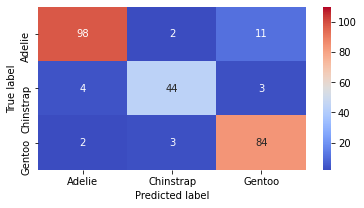

              precision    recall  f1-score   support

      Adelie       0.94      0.88      0.91       111
   Chinstrap       0.90      0.86      0.88        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.90       251
   macro avg       0.90      0.90      0.90       251
weighted avg       0.90      0.90      0.90       251

i: 0 j: 0 k: 1


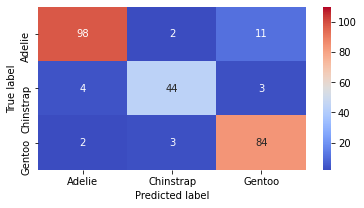

              precision    recall  f1-score   support

      Adelie       0.94      0.88      0.91       111
   Chinstrap       0.90      0.86      0.88        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.90       251
   macro avg       0.90      0.90      0.90       251
weighted avg       0.90      0.90      0.90       251

i: 0 j: 0 k: 2


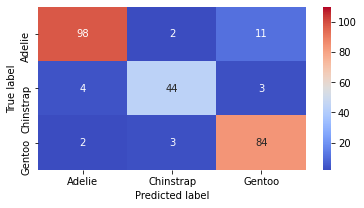

              precision    recall  f1-score   support

      Adelie       0.94      0.88      0.91       111
   Chinstrap       0.90      0.86      0.88        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.90       251
   macro avg       0.90      0.90      0.90       251
weighted avg       0.90      0.90      0.90       251

i: 0 j: 1 k: 0


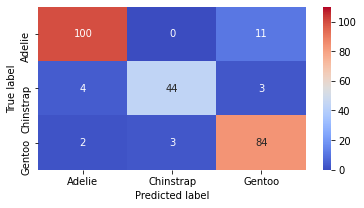

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 0 j: 1 k: 1


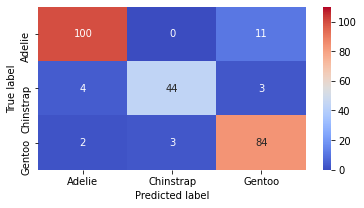

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 0 j: 1 k: 2


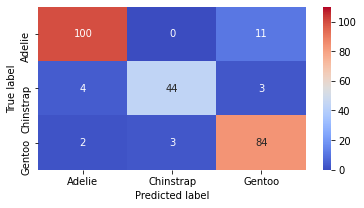

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 0 j: 2 k: 0


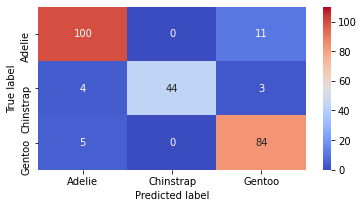

              precision    recall  f1-score   support

      Adelie       0.92      0.90      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 0 j: 2 k: 1


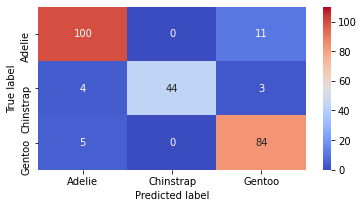

              precision    recall  f1-score   support

      Adelie       0.92      0.90      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 0 j: 2 k: 2


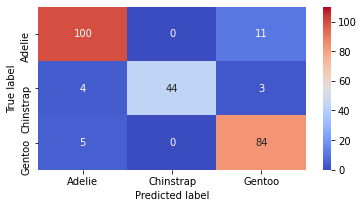

              precision    recall  f1-score   support

      Adelie       0.92      0.90      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 0 j: 3 k: 0


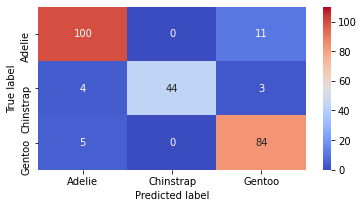

              precision    recall  f1-score   support

      Adelie       0.92      0.90      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 0 j: 3 k: 1


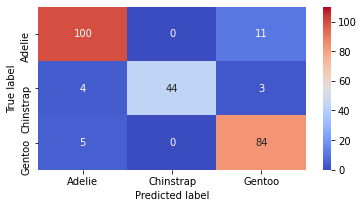

              precision    recall  f1-score   support

      Adelie       0.92      0.90      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 0 j: 3 k: 2


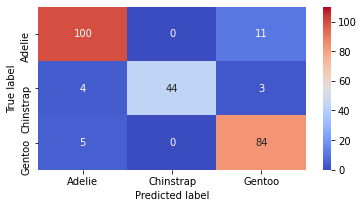

              precision    recall  f1-score   support

      Adelie       0.92      0.90      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 1 j: 0 k: 0


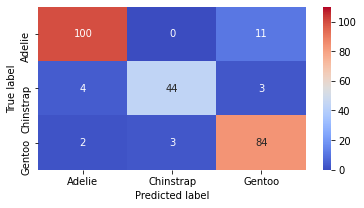

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 1 j: 0 k: 1


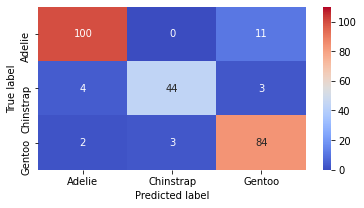

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 1 j: 0 k: 2


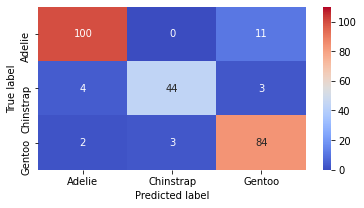

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 1 j: 1 k: 0


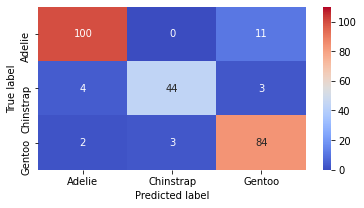

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 1 j: 1 k: 1


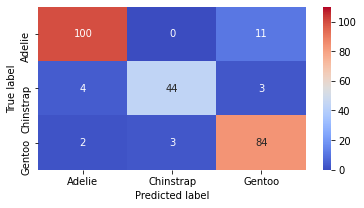

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 1 j: 1 k: 2


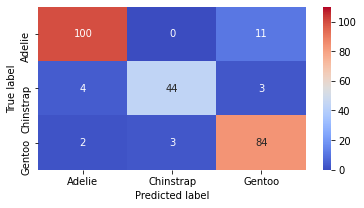

              precision    recall  f1-score   support

      Adelie       0.94      0.90      0.92       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.86      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.91      0.90      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 1 j: 2 k: 0


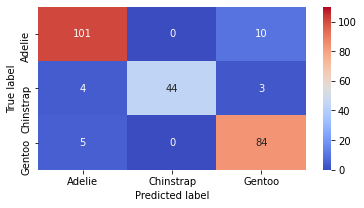

              precision    recall  f1-score   support

      Adelie       0.92      0.91      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.93      0.91      0.91       251
weighted avg       0.92      0.91      0.91       251

i: 1 j: 2 k: 1


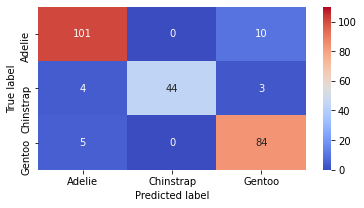

              precision    recall  f1-score   support

      Adelie       0.92      0.91      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.93      0.91      0.91       251
weighted avg       0.92      0.91      0.91       251

i: 1 j: 2 k: 2


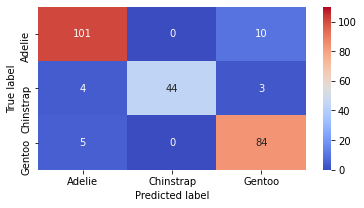

              precision    recall  f1-score   support

      Adelie       0.92      0.91      0.91       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.93      0.91      0.91       251
weighted avg       0.92      0.91      0.91       251

i: 1 j: 3 k: 0


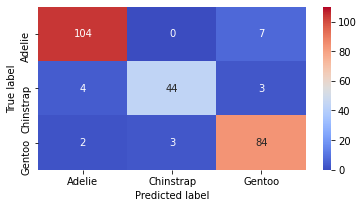

              precision    recall  f1-score   support

      Adelie       0.95      0.94      0.94       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.89      0.94      0.92        89

    accuracy                           0.92       251
   macro avg       0.93      0.91      0.92       251
weighted avg       0.93      0.92      0.92       251

i: 1 j: 3 k: 1


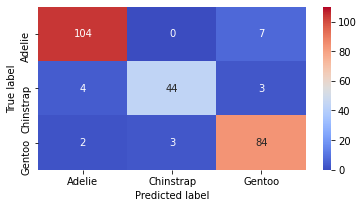

              precision    recall  f1-score   support

      Adelie       0.95      0.94      0.94       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.89      0.94      0.92        89

    accuracy                           0.92       251
   macro avg       0.93      0.91      0.92       251
weighted avg       0.93      0.92      0.92       251

i: 1 j: 3 k: 2


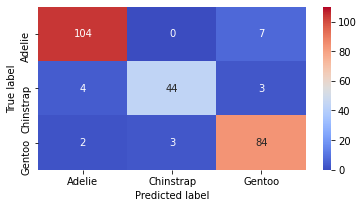

              precision    recall  f1-score   support

      Adelie       0.95      0.94      0.94       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.89      0.94      0.92        89

    accuracy                           0.92       251
   macro avg       0.93      0.91      0.92       251
weighted avg       0.93      0.92      0.92       251

i: 2 j: 0 k: 0


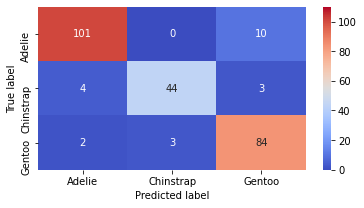

              precision    recall  f1-score   support

      Adelie       0.94      0.91      0.93       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.91      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 2 j: 0 k: 1


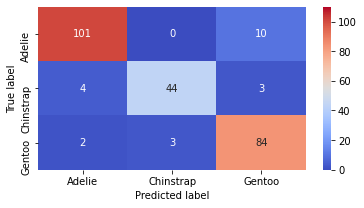

              precision    recall  f1-score   support

      Adelie       0.94      0.91      0.93       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.91      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 2 j: 0 k: 2


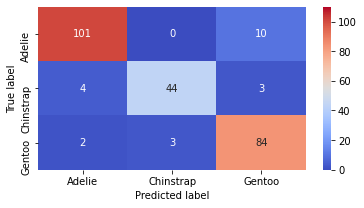

              precision    recall  f1-score   support

      Adelie       0.94      0.91      0.93       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.91      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 2 j: 1 k: 0


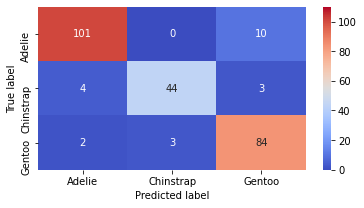

              precision    recall  f1-score   support

      Adelie       0.94      0.91      0.93       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.91      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 2 j: 1 k: 1


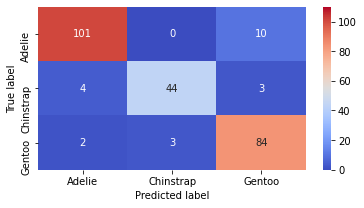

              precision    recall  f1-score   support

      Adelie       0.94      0.91      0.93       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.91      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 2 j: 1 k: 2


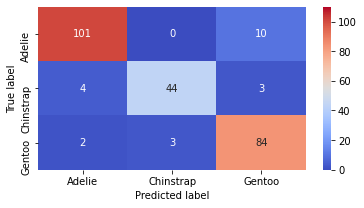

              precision    recall  f1-score   support

      Adelie       0.94      0.91      0.93       111
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.87      0.94      0.90        89

    accuracy                           0.91       251
   macro avg       0.92      0.91      0.91       251
weighted avg       0.91      0.91      0.91       251

i: 2 j: 2 k: 0


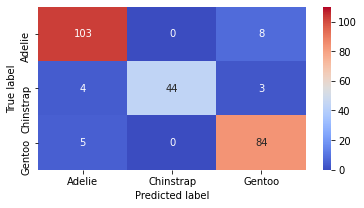

              precision    recall  f1-score   support

      Adelie       0.92      0.93      0.92       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.88      0.94      0.91        89

    accuracy                           0.92       251
   macro avg       0.93      0.91      0.92       251
weighted avg       0.92      0.92      0.92       251

i: 2 j: 2 k: 1


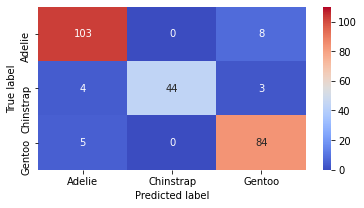

              precision    recall  f1-score   support

      Adelie       0.92      0.93      0.92       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.88      0.94      0.91        89

    accuracy                           0.92       251
   macro avg       0.93      0.91      0.92       251
weighted avg       0.92      0.92      0.92       251

i: 2 j: 2 k: 2


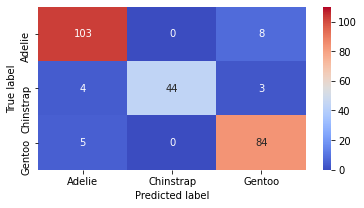

              precision    recall  f1-score   support

      Adelie       0.92      0.93      0.92       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.88      0.94      0.91        89

    accuracy                           0.92       251
   macro avg       0.93      0.91      0.92       251
weighted avg       0.92      0.92      0.92       251

i: 2 j: 3 k: 0


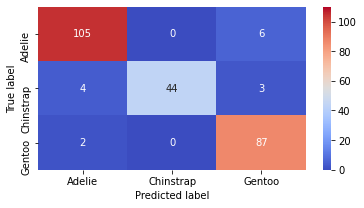

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.91      0.98      0.94        89

    accuracy                           0.94       251
   macro avg       0.95      0.93      0.94       251
weighted avg       0.94      0.94      0.94       251

i: 2 j: 3 k: 1


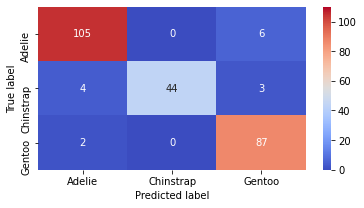

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.91      0.98      0.94        89

    accuracy                           0.94       251
   macro avg       0.95      0.93      0.94       251
weighted avg       0.94      0.94      0.94       251

i: 2 j: 3 k: 2


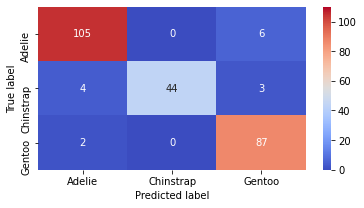

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95       111
   Chinstrap       1.00      0.86      0.93        51
      Gentoo       0.91      0.98      0.94        89

    accuracy                           0.94       251
   macro avg       0.95      0.93      0.94       251
weighted avg       0.94      0.94      0.94       251



In [4]:
#train:test = 1: 3---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
train_simplify = simplify.iloc[3::4].copy() # 3 7 11............
#print(train_simplify.index.tolist())
test_index = list(range(0,len(simplify),4)) + list(range(1,len(simplify),4)) + list(range(2,len(simplify),4))
test_index = sorted(test_index)
test_simplify = simplify.iloc[test_index].copy() # 0 1 2 4 5 6 8 9 10...............
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist()
print(dummy)
#-------------------------------------------------------------------------------------------------
# 建立 HistGradient 模型
para1 = [8,12,16]
para2 = [0.5,0.6,0.7,0.8] 
para3 = [2,3,4] 
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1):
    j = 0
    while j < len(para2):
        k = 0
        while k < len(para3):
            classifier = HistGradientBoostingClassifier(max_iter=para1[i],learning_rate = para2[j], max_depth = para3[k],random_state=100)
            model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
            # 預測
            test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
            predict = test_simplify_y_predicted.tolist()
            # -------------------------------------------------------
            test_simplify['predict'] = predict
            answer = {"species": test_simplify[factor[0]], "predict": predict}
            answer_df = pd.DataFrame(answer)
            ##print(answer_df) 
            print('i:',i,'j:',j,'k:',k)
            Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
            for l in range(111):
                if predict[l]=='Adelie':
                    Ade[0]+=1
                if predict[l]=='Chinstrap':
                    Chi[0]+=1
                if predict[l]=='Gentoo':
                    Gen[0]+=1
            for l in range(51):
                if predict[111+l]=='Adelie':
                    Ade[1]+=1
                if predict[111+l]=='Chinstrap':
                    Chi[1]+=1
                if predict[111+l]=='Gentoo':
                    Gen[1]+=1   
            for l in range(89):
                if predict[162+l]=='Adelie':
                    Ade[2]+=1
                if predict[162+l]=='Chinstrap':
                    Chi[2]+=1
                if predict[162+l]=='Gentoo':
                    Gen[2]+=1  
            fig, ax = plt.subplots(figsize=(6,3))  
            X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
            X1.index = ["Adelie","Chinstrap","Gentoo"] 
            sns.heatmap(X1 , cmap="coolwarm" , fmt = 'd',annot=True ,ax=ax,linecolor="purple",vmax = 110)  
            plt.xlabel("Predicted label")
            plt.ylabel("True label")  
            plt.show() 
            print(classification_report(test_simplify[factor[0]],predict)) 
            count = count + 1
            k = k + 1
        j = j + 1
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_FEMALE', 'sex_MALE']
i: 0 j: 0 k: 0


<ipython-input-5-e35d8c5c9ff7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-5-e35d8c5c9ff7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

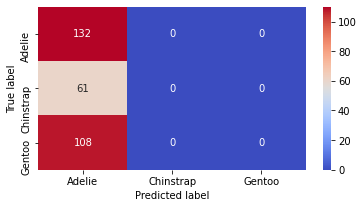

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 0 k: 1


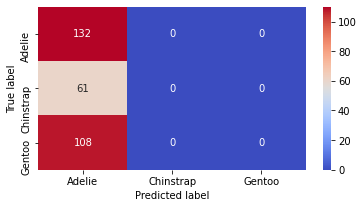

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 0 k: 2


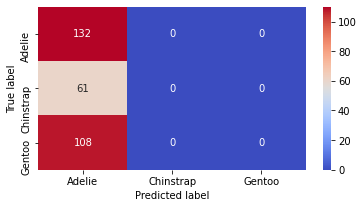

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 1 k: 0


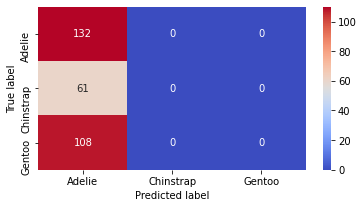

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 1 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


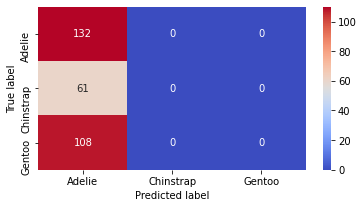

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 1 k: 2


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


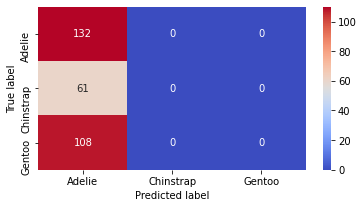

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 2 k: 0


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


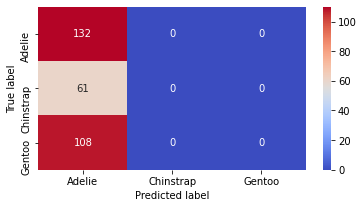

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 2 k: 1


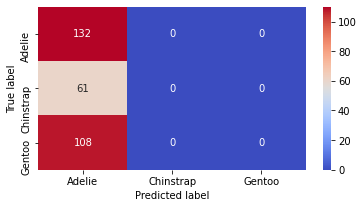

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 2 k: 2


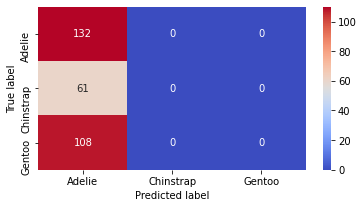

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 3 k: 0


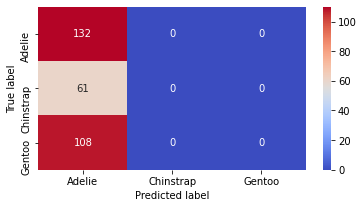

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 3 k: 1


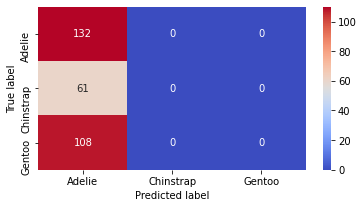

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 0 j: 3 k: 2


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


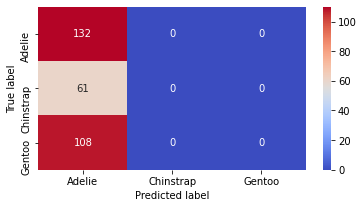

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 0 k: 0


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


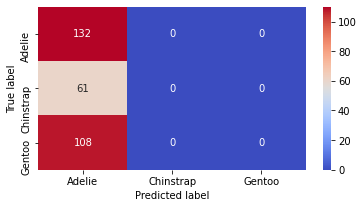

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 0 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


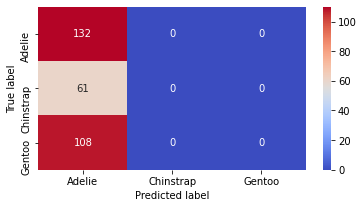

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 0 k: 2


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


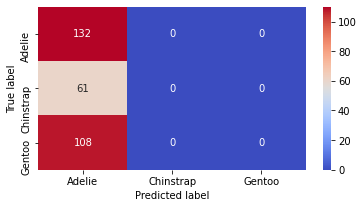

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 1 k: 0


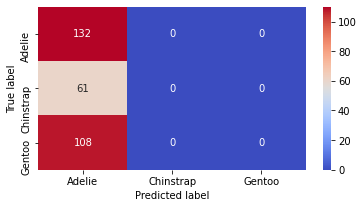

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 1 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


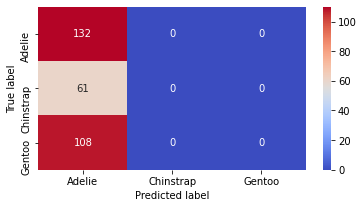

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 1 k: 2


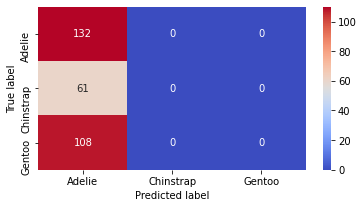

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 2 k: 0


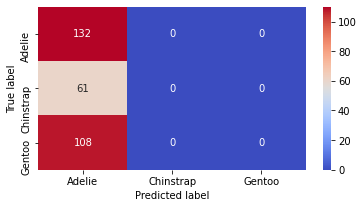

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 2 k: 1


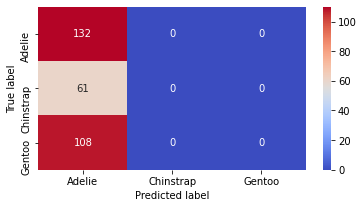

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 2 k: 2


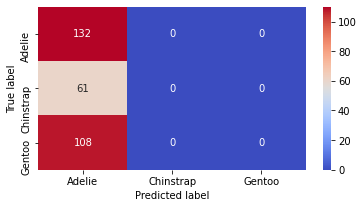

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 3 k: 0


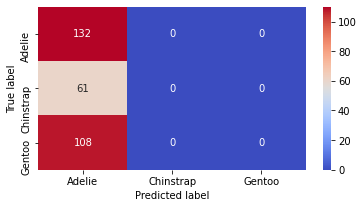

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 3 k: 1


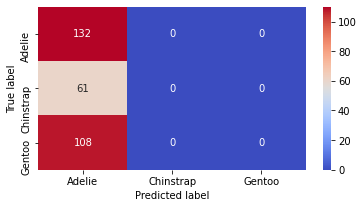

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 1 j: 3 k: 2


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


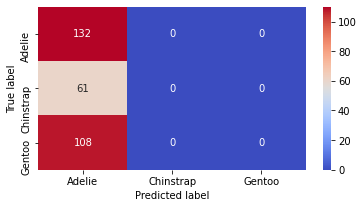

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 0 k: 0


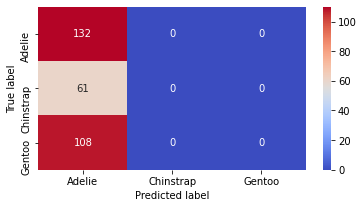

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 0 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


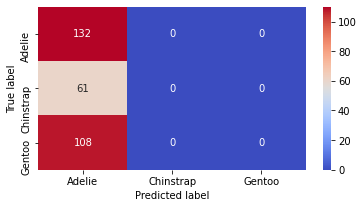

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 0 k: 2


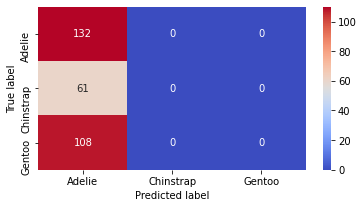

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 1 k: 0


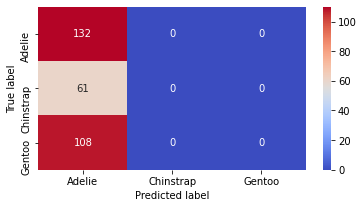

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 1 k: 1


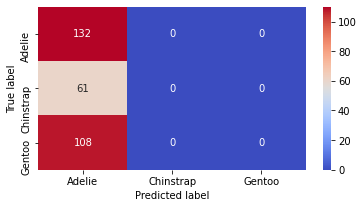

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 1 k: 2


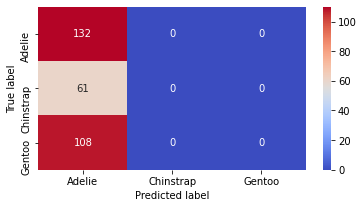

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 2 k: 0


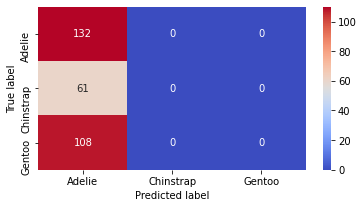

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 2 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


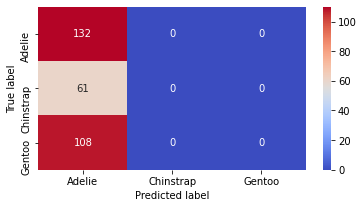

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 2 k: 2


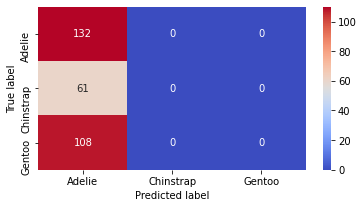

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 3 k: 0


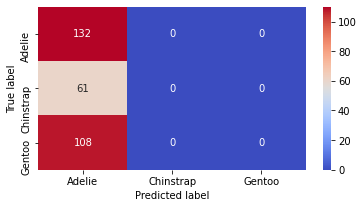

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 3 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


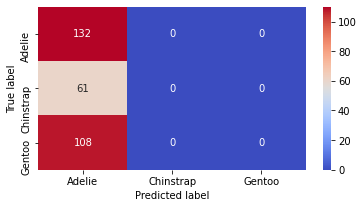

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301

i: 2 j: 3 k: 2


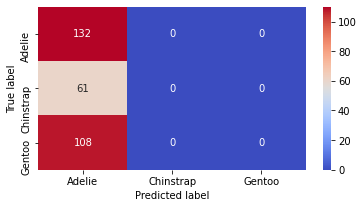

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       132
   Chinstrap       0.00      0.00      0.00        61
      Gentoo       0.00      0.00      0.00       108

    accuracy                           0.44       301
   macro avg       0.15      0.33      0.20       301
weighted avg       0.19      0.44      0.27       301



c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
#train:test = 1: 9---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
train_simplify = simplify.iloc[9::10].copy() # 9 19 29............
##print(train_simplify.index.tolist())
test_index = list(range(0,len(simplify),10)) + list(range(1,len(simplify),10)) + list(range(2,len(simplify),10)) + list(range(3,len(simplify),10)) + list(range(4,len(simplify),10)) + list(range(5,len(simplify),10)) + list(range(6,len(simplify),10)) + list(range(7,len(simplify),10)) + list(range(8,len(simplify),10))
test_index = sorted(test_index)
test_simplify = simplify.iloc[test_index].copy() # 0 1 2 3 4 5 6 7 8 10...............
##print(test_simplify.index.tolist())
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist()
print(dummy)
#-------------------------------------------------------------------------------------------------
# 建立 HistGradient 模型
para1 = [8,12,16]
para2 = [0.5,0.6,0.7,0.8] 
para3 = [2,3,4] 
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1):
    j = 0
    while j < len(para2):
        k = 0
        while k < len(para3):
            classifier = HistGradientBoostingClassifier(max_iter=para1[i],learning_rate = para2[j], max_depth = para3[k],random_state=100)
            model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
            # 預測
            test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
            predict = test_simplify_y_predicted.tolist()
            # -------------------------------------------------------
            test_simplify['predict'] = predict
            answer = {"species": test_simplify[factor[0]], "predict": predict}
            answer_df = pd.DataFrame(answer)
            ##print(answer_df) 
            print('i:',i,'j:',j,'k:',k)
            Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
            for l in range(132):
                if predict[l]=='Adelie':
                    Ade[0]+=1
                if predict[l]=='Chinstrap':
                    Chi[0]+=1
                if predict[l]=='Gentoo':
                    Gen[0]+=1
            for l in range(61):
                if predict[132+l]=='Adelie':
                    Ade[1]+=1
                if predict[132+l]=='Chinstrap':
                    Chi[1]+=1
                if predict[132+l]=='Gentoo':
                    Gen[1]+=1   
            for l in range(108):
                if predict[193+l]=='Adelie':
                    Ade[2]+=1
                if predict[193+l]=='Chinstrap':
                    Chi[2]+=1
                if predict[193+l]=='Gentoo':
                    Gen[2]+=1  
            fig, ax = plt.subplots(figsize=(6,3))  
            X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
            X1.index = ["Adelie","Chinstrap","Gentoo"] 
            sns.heatmap(X1 , cmap="coolwarm" , fmt = 'd',annot=True ,ax=ax,linecolor="purple",vmax = 110)  
            plt.xlabel("Predicted label")
            plt.ylabel("True label")  
            plt.show() 
            print(classification_report(test_simplify[factor[0]],predict)) 
            count = count + 1
            k = k + 1
        j = j + 1
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

<ipython-input-6-ab0f4aee9869>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-6-ab0f4aee9869>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_FEMALE', 'sex_MALE']
i: 0 j: 0 k: 0


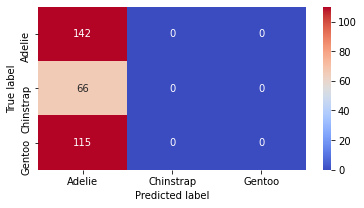

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 0 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


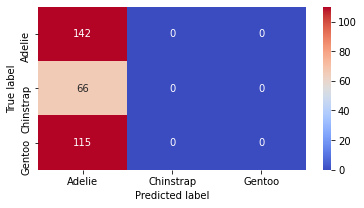

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 0 k: 2


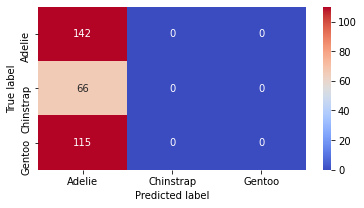

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 1 k: 0


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


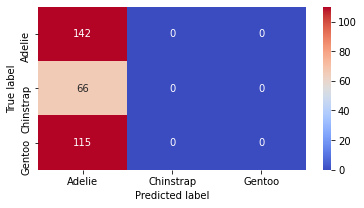

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 1 k: 1


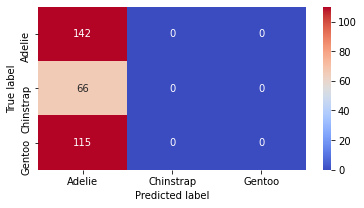

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 1 k: 2


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


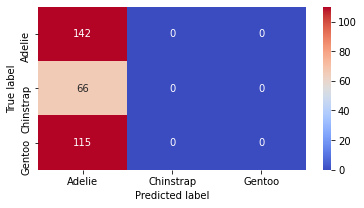

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 2 k: 0


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


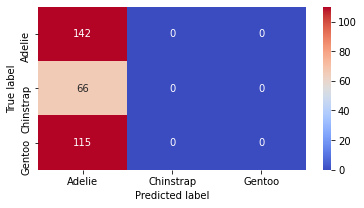

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 2 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


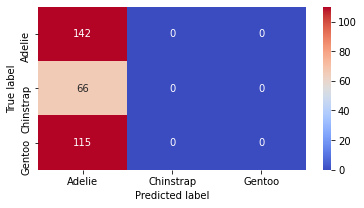

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 2 k: 2


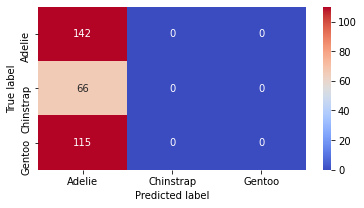

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 3 k: 0


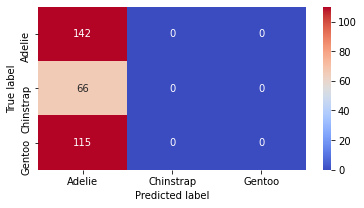

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 3 k: 1


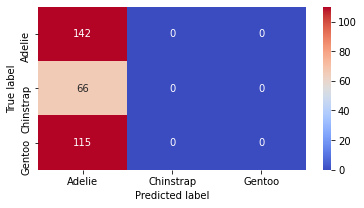

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 0 j: 3 k: 2


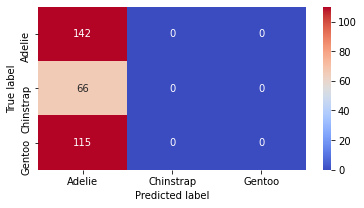

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 0 k: 0


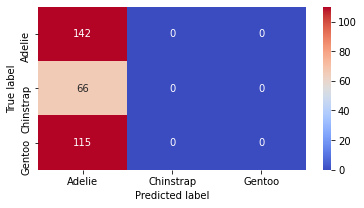

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 0 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


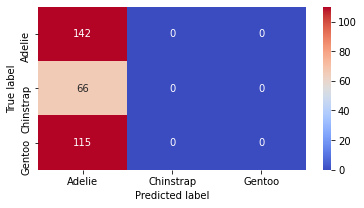

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 0 k: 2


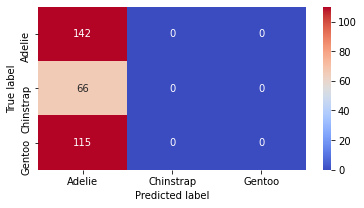

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 1 k: 0


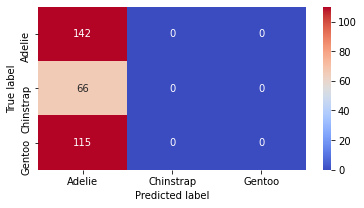

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 1 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


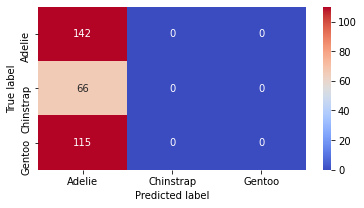

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 1 k: 2


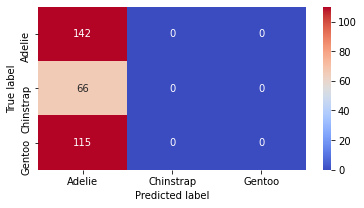

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 2 k: 0


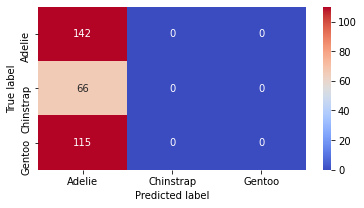

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 2 k: 1


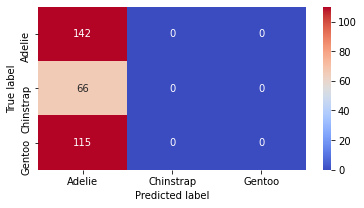

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 2 k: 2


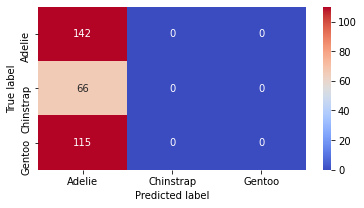

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 3 k: 0


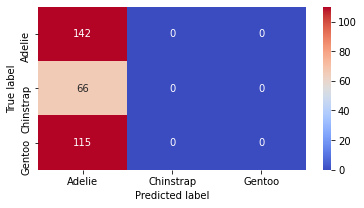

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 3 k: 1


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


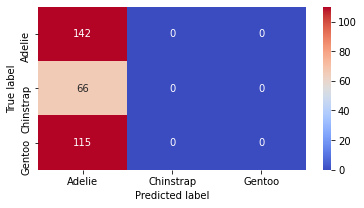

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 1 j: 3 k: 2


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


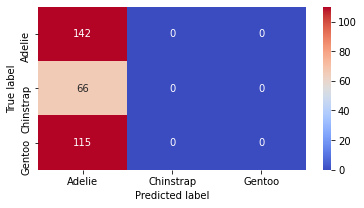

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 0 k: 0


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


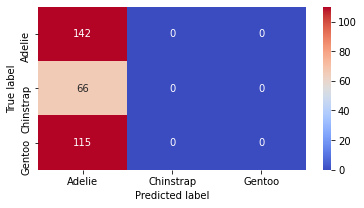

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 0 k: 1


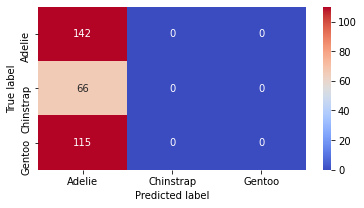

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 0 k: 2


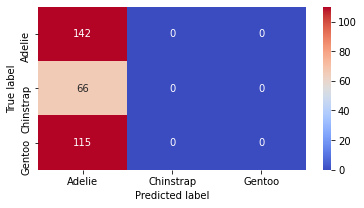

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 1 k: 0


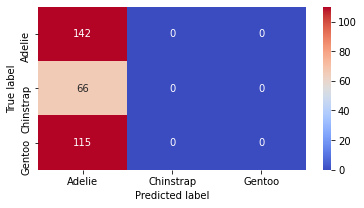

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 1 k: 1


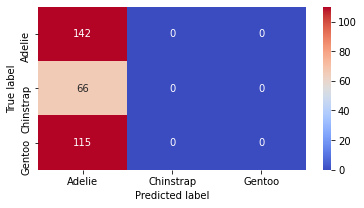

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 1 k: 2


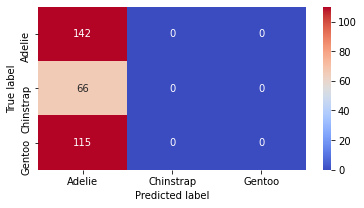

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 2 k: 0


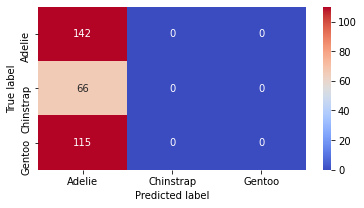

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 2 k: 1


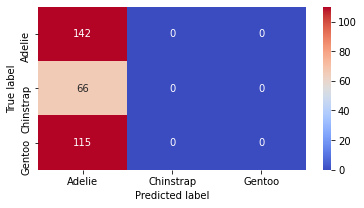

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 2 k: 2


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


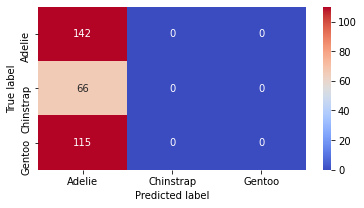

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 3 k: 0


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


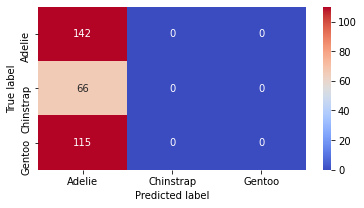

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 3 k: 1


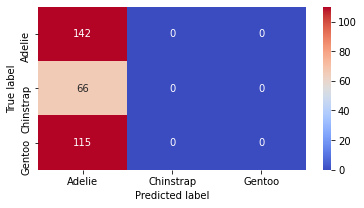

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323

i: 2 j: 3 k: 2


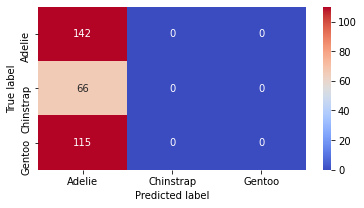

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       142
   Chinstrap       0.00      0.00      0.00        66
      Gentoo       0.00      0.00      0.00       115

    accuracy                           0.44       323
   macro avg       0.15      0.33      0.20       323
weighted avg       0.19      0.44      0.27       323



c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#train只取其中十筆，其餘為test---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
train_simplify = simplify.iloc[34::32].copy() # 34 66 98 130 162.......
#print(train_simplify)
test_index = list(range(0,len(simplify)))
del test_index[34::32]
test_simplify = simplify.iloc[test_index].copy() # 0 1 2...33 35............ 
#print(test_simplify.index.tolist()) 
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist()
print(dummy)
#-------------------------------------------------------------------------------------------------
# 建立 HistGradient 模型
para1 = [8,12,16]
para2 = [0.5,0.6,0.7,0.8] 
para3 = [2,3,4] 
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1):
    j = 0
    while j < len(para2):
        k = 0
        while k < len(para3):
            classifier = HistGradientBoostingClassifier(max_iter=para1[i],learning_rate = para2[j], max_depth = para3[k],random_state=100)
            model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
            # 預測
            test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
            predict = test_simplify_y_predicted.tolist()
            # -------------------------------------------------------
            test_simplify['predict'] = predict
            answer = {"species": test_simplify[factor[0]], "predict": predict}
            answer_df = pd.DataFrame(answer)
            ##print(answer_df) 
            print('i:',i,'j:',j,'k:',k)
            Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
            for l in range(142):
                if predict[l]=='Adelie':
                    Ade[0]+=1
                if predict[l]=='Chinstrap':
                    Chi[0]+=1
                if predict[l]=='Gentoo':
                    Gen[0]+=1
            for l in range(66):
                if predict[142+l]=='Adelie':
                    Ade[1]+=1
                if predict[142+l]=='Chinstrap':
                    Chi[1]+=1
                if predict[142+l]=='Gentoo':
                    Gen[1]+=1   
            for l in range(115):
                if predict[208+l]=='Adelie':
                    Ade[2]+=1
                if predict[208+l]=='Chinstrap':
                    Chi[2]+=1
                if predict[208+l]=='Gentoo':
                    Gen[2]+=1  
            fig, ax = plt.subplots(figsize=(6,3))  
            X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
            X1.index = ["Adelie","Chinstrap","Gentoo"] 
            sns.heatmap(X1 , cmap="coolwarm" , fmt = 'd',annot=True ,ax=ax,linecolor="purple",vmax = 110)  
            plt.xlabel("Predicted label")
            plt.ylabel("True label")  
            plt.show() 
            print(classification_report(test_simplify[factor[0]],predict)) 
            count = count + 1
            k = k + 1
        j = j + 1
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------